### Libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelBinarizer, StandardScaler, RobustScaler, OrdinalEncoder

### Utils

In [6]:
def describe_graph(name,data,transpose=False,showfliers=True):
    """ Generate boxplot with the combination of Variable and Variable_Duration
    Args:
        name (str): Variable that has a Variable_Duration columns
        data (pandas.DataFrame): Information to be use in the boxplot viz
        transpose (boolean) = False: swift varioble x for y
        showfliers (booolean) = True: Option to show or disable the outliers in Boxplot viz
    """
    x_name = name
    y_name = "{}_Duration".format(name)
    print("Unique values: {}".format(len(dataframe[x_name].unique())))
    if transpose:
        sns.boxplot(y=x_name,x=y_name,data=data,showfliers=showfliers)
    else:
        sns.boxplot(x=x_name,y=y_name,data=data,showfliers=showfliers)

def bar_correlation(corr_matrix,feature,threshold):
    """ Function to viz one line of the correlation matrix with a bar plot
        Args:
            corr_matrix (np.array): correlation matrix of the features , can include the target variable
            feature (str): name of the feature to calculate the graph
            threshold (int): limit what variables to show if the correlation is not more than the given value
    """
    plt.figure(figsize=(15,5))
    z = corr_matrix.drop(feature,axis=0)[feature].sort_values(ascending=False)
    z = z[abs(z.values) > threshold]
    sns.barplot(x=z.index, y=z.values)
    plt.xticks(rotation=90)
    plt.show()

def histogram_boxplot(feature, figsize=(15, 5), bins=None):
    """ Boxplot and histogram combined
        Args:
            feature (array): feature vector
            figsize (tuple[int,int]): size of fig 
            bins (int): number of bins
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

### Objective

- Classify customer into Buyers (Revenue = True) or Explorers (Revenue = False)
- Find relevant groups that can be use for targeting (Cluster Customers)
- Build a process for Missing Information for Customers

### Data Understanding & EDA

[Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset).

- The dataset consists of 10 numerical and 8 categorical variables.

In [9]:
dataframe = pd.read_csv("../data/online_shoppers_intention.csv.gz")

In [10]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

The categorical variables are represent in numeric value. 

- Variable `Revenue` is the target label. This binary variable is imbalanced, specifically 84.5% of user journeys did NOT result in a purchase; in other words `Revenue` is False.

Number of purchase by online customer 15.47%


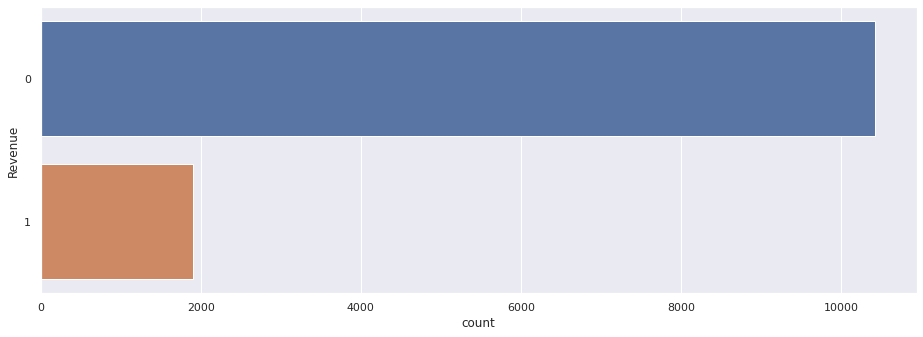

In [12]:
revenue = dataframe[["Revenue"]].astype(int)
sale_prob = revenue.mean()[0]
print("Number of purchase by online customer {:.2f}%".format(sale_prob*100))
sns.set(rc={'figure.figsize':(15.7,5.27)})
sns.countplot(y="Revenue",data=revenue)
plt.show()

For the variable Revenue it will be applied methos of oversmpling and bucketing (Cluster the data and then applied different models)


- `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related`, and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated when a user takes an action, e.g, moving from one page to another.

Unique values: 27


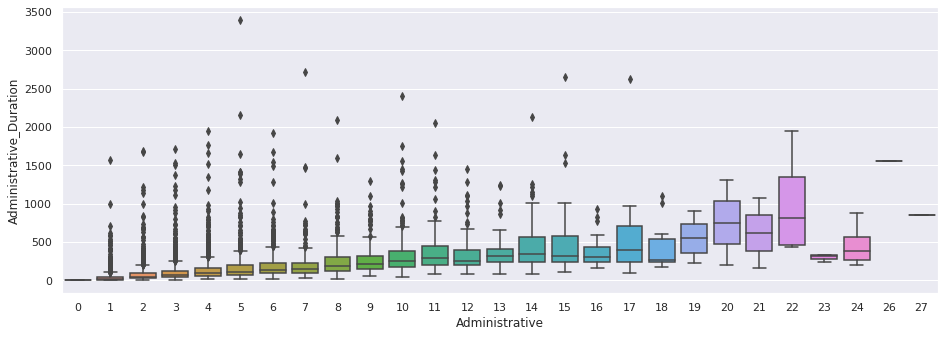

In [16]:
describe_graph("Administrative",dataframe)

Unique values: 17


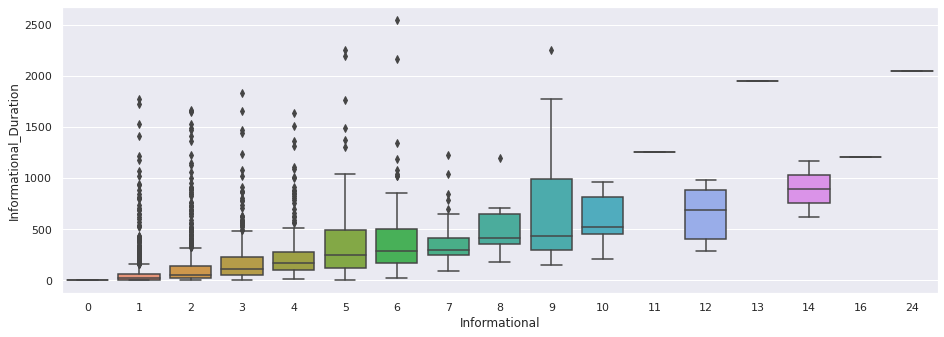

In [17]:
describe_graph("Informational",dataframe)

Unique values: 311


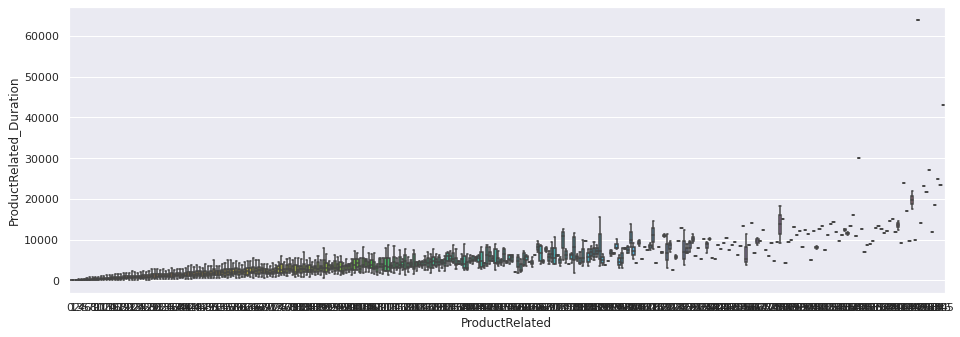

In [18]:
describe_graph("ProductRelated",dataframe,showfliers=False)

In [19]:
corr_matrix = dataframe[[
    "Administrative","Administrative_Duration"
    ,"Informational","Informational_Duration"
    ,"ProductRelated","ProductRelated_Duration"]
].corr()

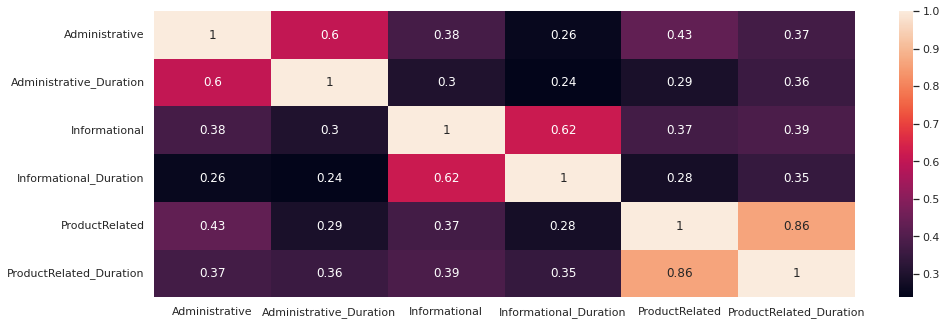

In [20]:
sns.heatmap(corr_matrix,annot=True)
plt.show()

These variables show that exists a linear relationship between the categorical variable and the duration of the categorical variables. in the bloxplot show that the categorical variables are like bin representation of the duration of the variable. for all the variables if the categorica variable is Zero then the duration (numerical variable) is zero. It will be evaluate if the features can be dropout of the feature or combine it due to the colinearity that can inject to the models (And create weights that are bias). In this sense we could use Categorical variables for a given model and numerical variables to create better cluster for a data perspective approach 

Features `Bounce Rate`, `Exit Rate` and `Page Value` represent  metrics measured by Google Analytics for each page in the e-commerce site. 

- The value of `Bounce Rate` for a web page refers to the percentage of visitors who enter the site from that page and then leave (i.e., bounce) without triggering any other requests to the analytics server during that session. 

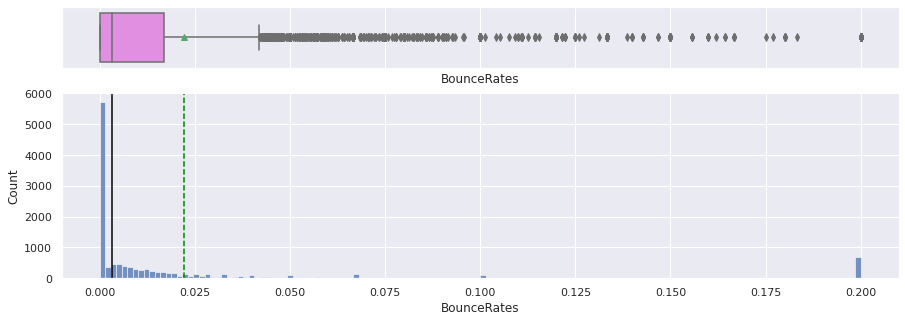

In [21]:
histogram_boxplot(dataframe["BounceRates"])

- The value of `Exit Rate` for a specific web page is calculated as for all page views to the page and it represents the percentage that the page was seen in the last session. 

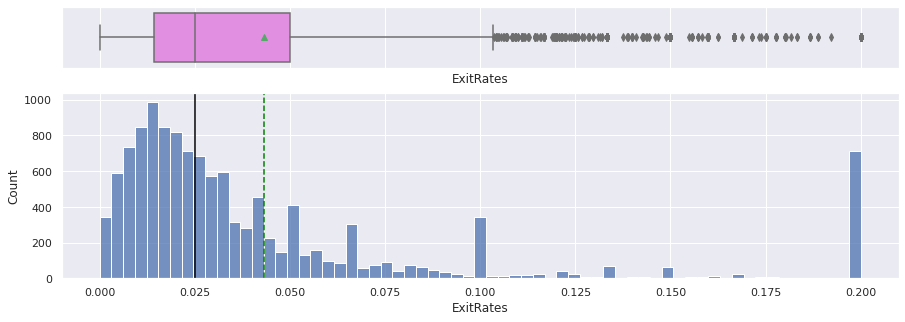

In [22]:
histogram_boxplot(dataframe["ExitRates"])

- Feature `Page Value` represents the average value for a web page that a user visited before completing an e-commerce transaction. 

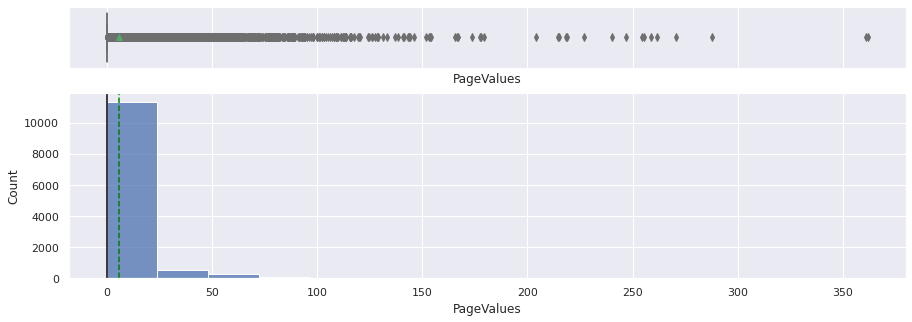

In [23]:
histogram_boxplot(dataframe["PageValues"])

For the numerical values of this section we will have to scale with thecniques that can address outliers given that it shows long tails and skew to zero

- Feature `Special Day` indicates the closeness of the site visiting time to a specific special day (e.g., Mother’s Day or Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 

In [24]:
pd.DataFrame(dataframe.value_counts("Month")).T

Month,May,Nov,Mar,Dec,Oct,Sep,Aug,Jul,June,Feb
0,3364,2998,1907,1727,549,448,433,432,288,184


In [25]:
dataframe.groupby("Month").agg({"SpecialDay":"mean"}).T

Month,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
SpecialDay,0.0,0.0,0.233696,0.0,0.0,0.0,0.212366,0.0,0.0,0.0


Feb has 42.93% of Special Day value


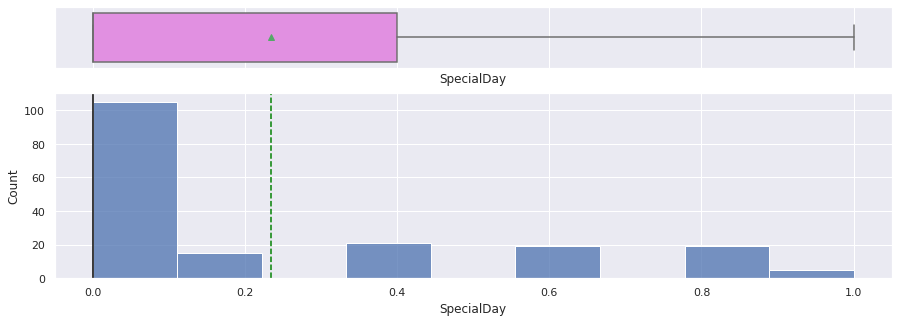

May has 34.84% of Special Day value


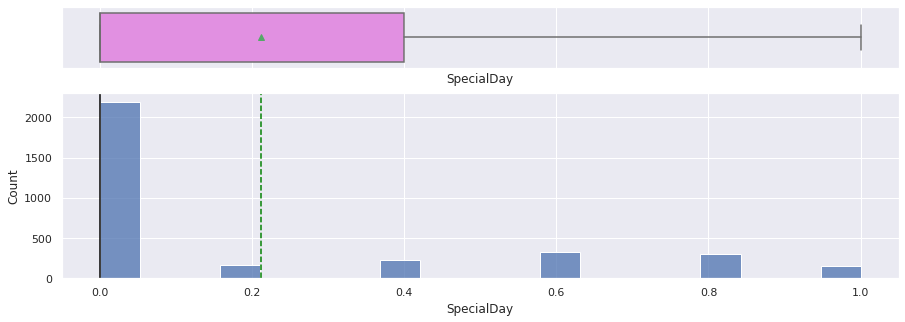

All other months do not have value


In [26]:
for month, df in dataframe.groupby("Month"):
    mean_special_day = np.mean(df["SpecialDay"]>0)
    if mean_special_day>0:
        print("{} has {}% of Special Day value".format(month,np.round(mean_special_day*100,2)))
        histogram_boxplot(df["SpecialDay"])
        plt.show()
print("All other months do not have value")

The special day can be use to generate a dummy variable indicating if the month has a Special date in it. given that just twom months has value for this feature. and it can be a combination of a Month with special day, and the value of the special date. 



- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a boolean value indicating whether the date of the visit is weekend, and month of the year.

In [27]:
pd.DataFrame(dataframe.value_counts("OperatingSystems")).T

OperatingSystems,2,1,3,4,8,6,7,5
0,6601,2585,2555,478,79,19,7,6


In [28]:
pd.DataFrame(dataframe.value_counts("Browser")).T

Browser,2,1,4,5,6,10,8,3,13,7,12,11,9
0,7961,2462,736,467,174,163,135,105,61,49,10,6,1


In [29]:
pd.DataFrame(dataframe.value_counts("Region")).T

Region,1,3,4,2,6,7,9,8,5
0,4780,2403,1182,1136,805,761,511,434,318


In [30]:
pd.DataFrame(dataframe.value_counts("TrafficType")).T

TrafficType,2,1,3,4,13,10,6,8,5,11,20,9,7,15,19,14,18,16,12,17
0,3913,2451,2052,1069,738,450,444,343,260,247,198,42,40,38,17,13,10,3,1,1


ALL the operation / System with me process as categorical variables

In [31]:
pd.DataFrame(dataframe.value_counts("Weekend")).T

Weekend,False,True
0,9462,2868


In [32]:
pd.DataFrame(dataframe.value_counts("VisitorType")).T

VisitorType,Returning_Visitor,New_Visitor,Other
0,10551,1694,85


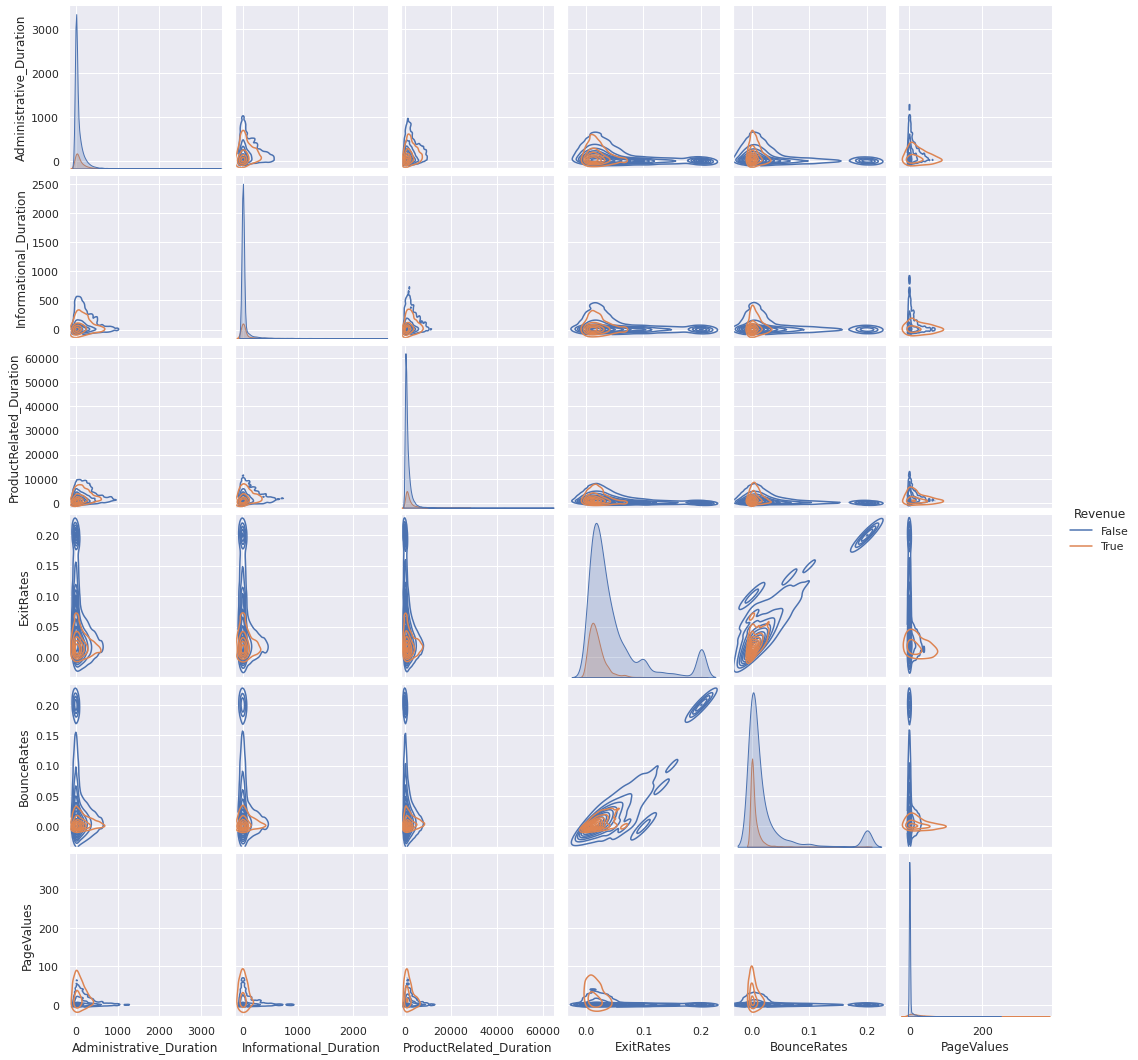

In [35]:
# Generate a seaborn pairplot with kde
sns.pairplot(data=dataframe[["Revenue","Administrative_Duration","Informational_Duration","ProductRelated_Duration","ExitRates","BounceRates","PageValues"]],hue="Revenue",kind="kde")
plt.show()

For all the numeric variable, there is none that present a patter of having a big impact over the target variable, but the compination with Page Value a different metric could give a understanding of Customers that Buy or not. For categorical variables, we will use different thecniques that let us understand the behavior of the data.

### Data Preprocessing (Setup)

For the data to be use in ML models, we need to have all the variables in a numeric representation and scale in the same scale. For this, It will be use the transformation for the categorical variables and Scaling for numeric, continues value. the data will be separate for months.

In [11]:
target = "Revenue"
numeric_columns = ["Administrative_Duration","Informational_Duration","ProductRelated_Duration","ExitRates","BounceRates","PageValues","SpecialDay"]
categorical_columns = ["Administrative","VisitorType","Informational","ProductRelated","Region","TrafficType","OperatingSystems","Browser","Weekend"]

In [12]:
# From dataframe, generate Train and Test data. Test data is from Feb - Mar and TRAIN data is from Apr - Dec
months = ["Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
train_data = dataframe[dataframe["Month"].isin(months[3:])]
test_data = dataframe[dataframe["Month"].isin(months[:3])]

For every categorical variable we will applied a one hot encoder transformation. The Product Related will generate the sparsest matrix given that it has 306 unique values, Every Numeric (Continues variable) will be scaled with different type os techniques. 

In [13]:
steps = []
# Standardize the data
for n in categorical_columns:
    lb = LabelBinarizer()
    steps.append((n,lb))

# RobustScaler is used to avoid the outliers
for n in numeric_columns:
    scaler = RobustScaler()
    steps.append(([n],scaler))

# The mapper will applied and return the dataframe
mapper = DataFrameMapper(steps,df_out=True)

### Data Modeling

In [14]:
# Import Pipeline in order to apply the mapper
from sklearn.pipeline import Pipeline
# Import LogisticRegression, Random Forest and SVM from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Import the Classification Report from sklearn
from sklearn.metrics import classification_report

Metrics to be used for evaluation:

* **F1**: Is a measure of quality of prediction. It is the harmonic mean of precision and recall. High F1 score indicates high quality of prediction.
* **Recall**: is the proportion of actual buyers that the model identify correctly. Its a measure of how many patterns of the target variable are correctly identified by the model.
* **Precision**: is the proportion of correctly identified buyers. Its a measure of how well the model is able to identify buyers. (Confidence)

# Classification Task - Customer recognition (Buying or not)

#### Iteration #1: Baseline model + Feature Selection

##### Logistic regresion
It will be combine the categorical variables with the numeric variables and apply the logistic regression. Logistic regression is a probabilistic classification algorithm that is used to predict the probability of a binary event (e.g., whether a customer will purchase a product or not). the weights of the variables represent the importance of the they in the model. the above model is using L1 regularization, the model will be more sparse and will let us see the impact of the variables on the model.

In [15]:
# lasso is used to remove the features with low importance
logistic = Pipeline([("preprocessing",mapper),("logistic",LogisticRegression(C=1e5,penalty="l1",solver="liblinear"))])
logistic.fit(train_data[categorical_columns+numeric_columns],train_data[target])
predictions = logistic.predict(test_data[categorical_columns+numeric_columns])
print(classification_report(test_data[target],predictions))

              precision    recall  f1-score   support

       False       0.95      0.98      0.96      1896
        True       0.73      0.45      0.56       195

    accuracy                           0.93      2091
   macro avg       0.84      0.72      0.76      2091
weighted avg       0.93      0.93      0.93      2091



the model present a low recall and a low f1 score for customer that purchase a products. Logistic regression is making an optimization using all the variables at the same time. 

##### Feature Importance Logistic model #####
we will assume that the weight of the model denote the importance of the variable to predict the target variable.

In [16]:
# Extract the feature importances from the model, without the bias term
feature_importances = logistic.named_steps["logistic"].coef_[0]
feature_names = logistic.named_steps["preprocessing"].transform(train_data[categorical_columns+numeric_columns]).columns.values
# Build a pandas dataframe with the feature importances
feature_importances_df = pd.DataFrame(feature_importances,columns=["Importance"],index=feature_names)
feature_importances_df["absolute_importance"] = feature_importances_df["Importance"].abs()
feature_importances_df.sort_values(by="absolute_importance",ascending=False,inplace=True)

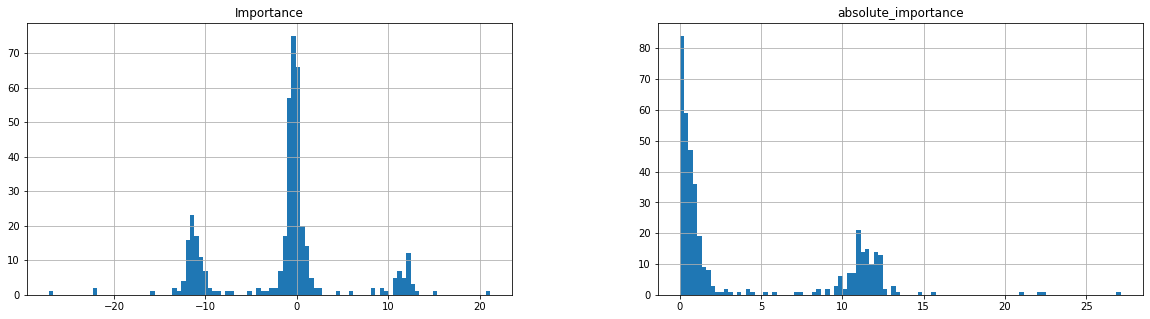

In [17]:
# Histogram of the feature importances
feature_importances_df.hist(bins=100,figsize=(20,5))
plt.show()

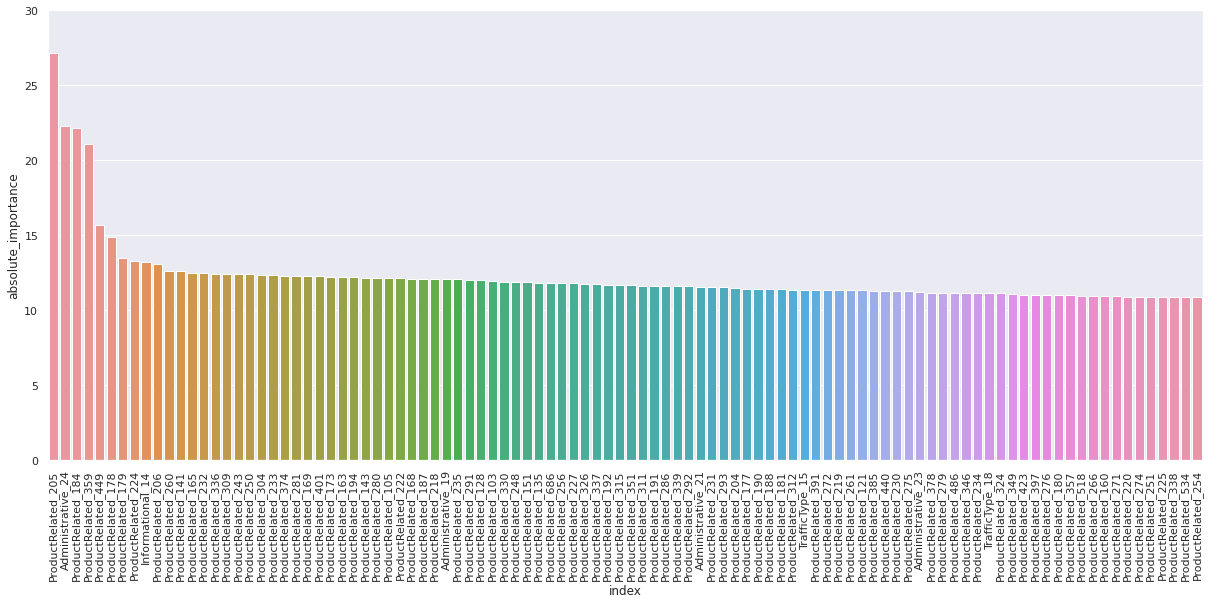

In [18]:
# Horizontal Graph for the feature importances Seaborne plot (Top 50 features)
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.barplot(y="absolute_importance",x="index",data=feature_importances_df.reset_index().head(100))
plt.ylim(0,30)
plt.xticks(rotation=90)
plt.show()

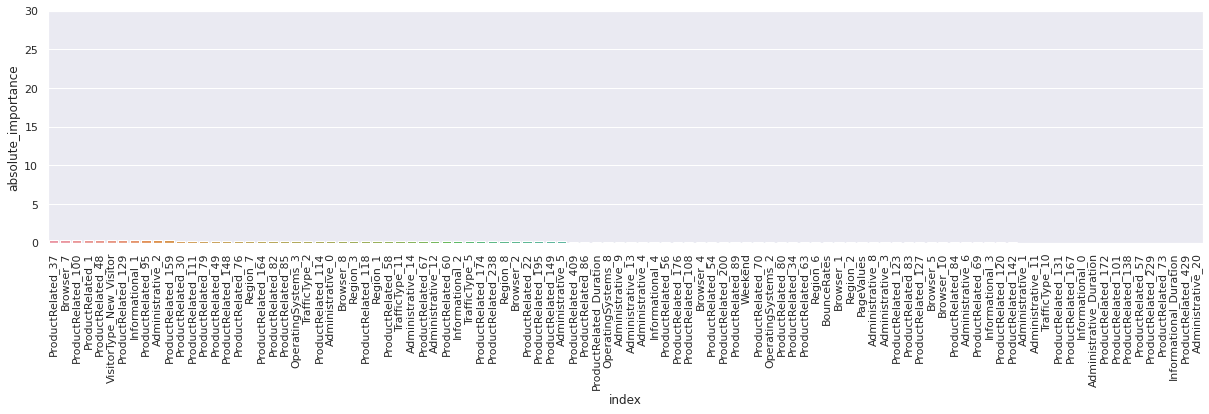

In [19]:
# Horizontal Graph for the feature importances Seaborne plot (Top 50 features)
sns.set(rc={'figure.figsize':(20.7,4.27)})
sns.barplot(y="absolute_importance",x="index",data=feature_importances_df.reset_index().tail(100))
plt.ylim(0,30)
plt.xticks(rotation=90)
plt.show()

The above graphics shows that:
1. less than 20 variables have weightage greater than 5, meaning that most of the features could not be use in the model, but it contrast almost all vairables are dummy variables.
2. Eventhough the process is using one hot encoder, it seems like the model cannot capture the information of the categorical variables.
3. ProducRelated information seem to be a relevant feature. althought it is just a categorical.

As next step, we will use the feature selection technique to select the features that are relevant to the model using Random Forest.

### Random Forest

For this step it will be used the Random Forest model. The Random Forest model is a meta-learning algorithm that combines many decision trees to build a more accurate model. The Random Forest model is a bagging algorithm that is used to create a forest of decision trees. The trees in the forest are created by randomly selecting features and splitting the data into subsets. The trees in the forest are then trained on the subsets. The trees in the forest are then used to make predictions on the data. compare with the logistic regression, given the feature selection technique, Random Forest can capture different important features.


In [20]:
# Random Forest Classifier
random_forest = Pipeline([("preprocessing",mapper),("random_forest",RandomForestClassifier(n_estimators=500,random_state=0))])
random_forest.fit(train_data[categorical_columns+numeric_columns],train_data[target])
predictions = random_forest.predict(test_data[categorical_columns+numeric_columns])
print(classification_report(test_data[target],predictions))

              precision    recall  f1-score   support

       False       0.95      0.99      0.97      1896
        True       0.80      0.53      0.64       195

    accuracy                           0.94      2091
   macro avg       0.88      0.76      0.80      2091
weighted avg       0.94      0.94      0.94      2091



the results of F1 , Precision and recall from the Random Forest model is slightly better than the logistic regression model. the F1 has increase from 0.56 to 0.64, the recall has increase from 0.46 to 0.53 and the precision has increase from 0.74 to 0.80.

##### Feature Importance Random Forest #####
from sklearn documentation the feature importance is:

    feature_importances_: The impurity-based feature importances. The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

    Warning: impurity-based feature importances can be misleading for high cardinality features (many unique values). See sklearn.inspection.permutation_importance as an alternative.

It will be applied two metrics to show the importance of the feature

In [38]:
# Feature Importances of the Random Forest Classifier
feature_importances = random_forest.named_steps["random_forest"].feature_importances_
feature_names = random_forest.named_steps["random_forest"].feature_names_in_
std = np.std([tree.feature_importances_ for tree in random_forest.named_steps["random_forest"].estimators_], axis=0)
feature_importances_df = pd.DataFrame({"Importance":feature_importances,"std":std},index=feature_names)
feature_importances_df.sort_values(by="Importance",ascending=False,inplace=True)

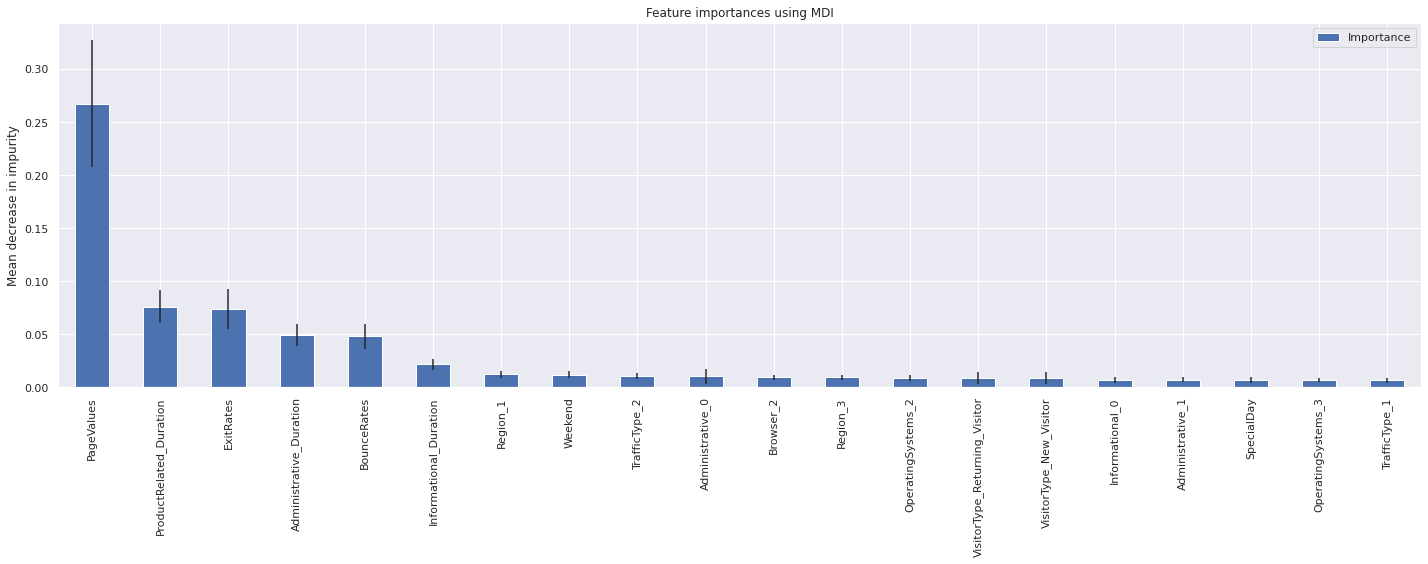

In [42]:
fig, ax = plt.subplots()
feature_importances_df.head(20).plot.bar(yerr="std", ax=ax,figsize=(20,8))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Iteration #2: Different Preprocessing Techniques + Random Forest + Feature Selection

##### Preprocessing Step as non One hot + Random Forest 

In [52]:
steps = []
# Standardize the data
for n in categorical_columns:
    le = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
    steps.append(([n],le))

# RobustScaler is used to avoid the outliers
for n in numeric_columns:
    scaler = RobustScaler()
    steps.append(([n],scaler))

# The mapper will applied and return the dataframe
mapper_non_sparse = DataFrameMapper(steps,df_out=True)

In [53]:
# Random Forest Classifier
random_forest = Pipeline([("preprocessing",mapper_non_sparse),("random_forest",RandomForestClassifier(n_estimators=500,random_state=0))])
random_forest.fit(train_data[categorical_columns+numeric_columns],train_data[target])
predictions = random_forest.predict(test_data[categorical_columns+numeric_columns])
print(classification_report(test_data[target],predictions))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97      1896
        True       0.78      0.65      0.71       195

    accuracy                           0.95      2091
   macro avg       0.87      0.82      0.84      2091
weighted avg       0.95      0.95      0.95      2091



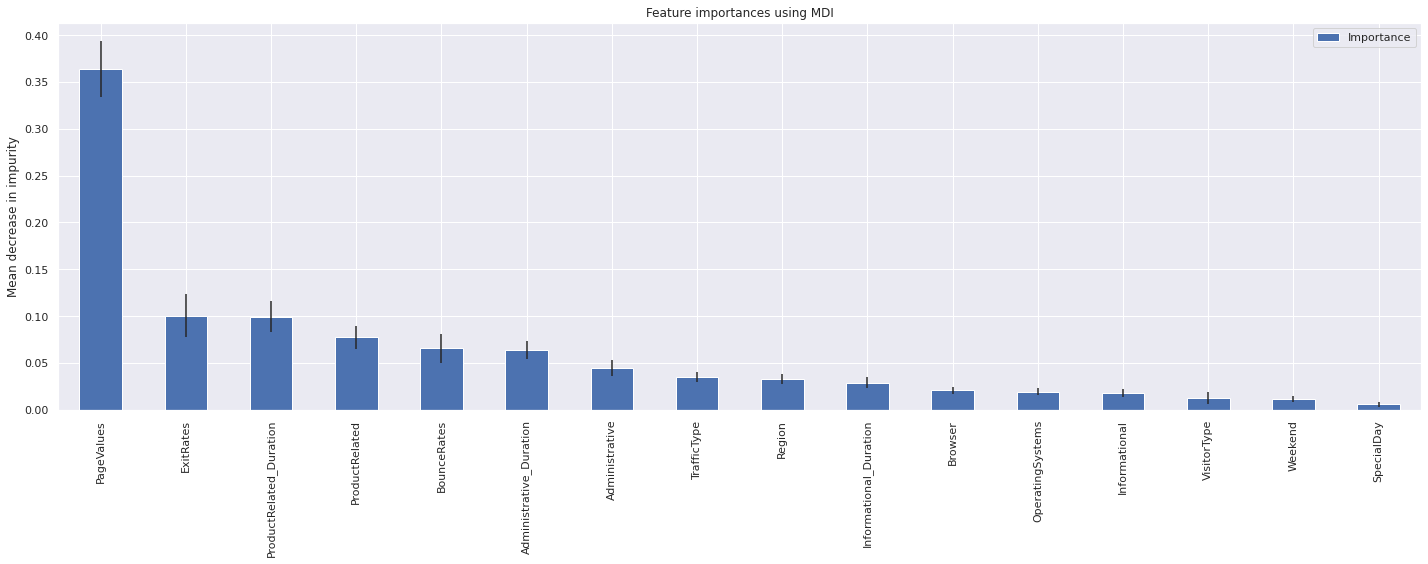

In [54]:
# Feature Importances of the Random Forest Classifier
feature_importances = random_forest.named_steps["random_forest"].feature_importances_
feature_names = random_forest.named_steps["random_forest"].feature_names_in_
std = np.std([tree.feature_importances_ for tree in random_forest.named_steps["random_forest"].estimators_], axis=0)
feature_importances_df = pd.DataFrame({"Importance":feature_importances,"std":std},index=feature_names)
feature_importances_df.sort_values(by="Importance",ascending=False,inplace=True)
fig, ax = plt.subplots()
feature_importances_df.head(20).plot.bar(yerr="std", ax=ax,figsize=(20,8))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Given that ProductRelated it can be assume to be a categorical variable with High cardinality (lot of unique values). we will compute the permutation importance of the feature to verify if it is a relevant feature.

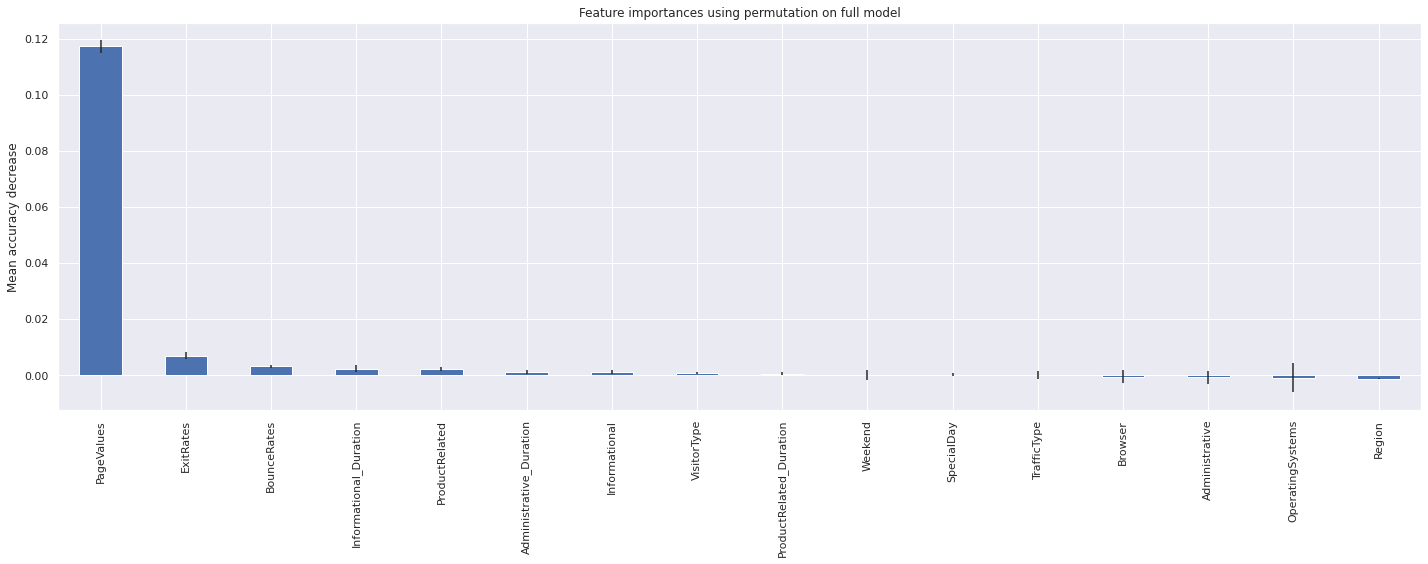

In [58]:
from sklearn.inspection import permutation_importance

forest = random_forest
X_test = test_data[categorical_columns+numeric_columns]
y_test = test_data[target]

result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=30)
forest_importances = pd.Series(result.importances_mean, index=feature_names)
forest_importances.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax,figsize=(20,8))
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

#### Iteration #3: Oversampling + Random Forest + Set of Features

In [78]:
datasets = []
for class_label, df in train_data.groupby("Revenue"):
    if class_label:
        # sample the data with replacement
        df_sample = df.sample(n=int(len(df)*3), replace=True, random_state=0)
        datasets.append(df_sample)
    else:
        datasets.append(df)

In [80]:
train_data_oversample = pd.concat(datasets).sample(frac=1).reset_index(drop=True)

Due to High Correlation it is remove Administrative , Informational and ProducRelated Duration (being part of top 10 PI) and will remove just the operational variables. (Operating System and Browser)

In [139]:
target = "Revenue"

numeric_columns = ["Administrative_Duration","Informational_Duration","ExitRates","BounceRates","PageValues","SpecialDay"]
categorical_columns = ["VisitorType","ProductRelated","Region","TrafficType","Weekend"]

In [140]:
steps = []
# Standardize the data
for n in categorical_columns:
    le = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
    steps.append(([n],le))

# RobustScaler is used to avoid the outliers
for n in numeric_columns:
    scaler = RobustScaler()
    steps.append(([n],scaler))

# The mapper will applied and return the dataframe
mapper_non_sparse = DataFrameMapper(steps,df_out=True)

In [141]:
# Random Forest Classifier
random_forest = Pipeline([("preprocessing",mapper_non_sparse),("random_forest",RandomForestClassifier(n_estimators=500,random_state=0))])
random_forest.fit(train_data_oversample[categorical_columns+numeric_columns],train_data_oversample[target])
predictions = random_forest.predict(test_data[categorical_columns+numeric_columns])
print(classification_report(test_data[target],predictions))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97      1896
        True       0.74      0.74      0.74       195

    accuracy                           0.95      2091
   macro avg       0.86      0.86      0.86      2091
weighted avg       0.95      0.95      0.95      2091



In [148]:
# Random Forest Classifier
random_forest = Pipeline([("preprocessing",mapper_non_sparse),("random_forest",RandomForestClassifier(n_estimators=100,random_state=0))])
random_forest.fit(train_data_oversample[categorical_columns+numeric_columns],train_data_oversample[target])
predictions = random_forest.predict(test_data[categorical_columns+numeric_columns])
print(classification_report(test_data[target],predictions))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97      1896
        True       0.74      0.73      0.74       195

    accuracy                           0.95      2091
   macro avg       0.85      0.85      0.85      2091
weighted avg       0.95      0.95      0.95      2091



In [142]:
# Random Forest Classifier
random_forest = Pipeline([("preprocessing",mapper_non_sparse),("random_forest",RandomForestClassifier(n_estimators=5000,random_state=0))])
random_forest.fit(train_data_oversample[categorical_columns+numeric_columns],train_data_oversample[target])
predictions = random_forest.predict(test_data[categorical_columns+numeric_columns])
print(classification_report(test_data[target],predictions))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97      1896
        True       0.74      0.74      0.74       195

    accuracy                           0.95      2091
   macro avg       0.86      0.86      0.86      2091
weighted avg       0.95      0.95      0.95      2091



the final model will have 500 tress

#### Final Classification model

In [150]:
# Random Forest Classifier
final_model = Pipeline([("preprocessing",mapper_non_sparse),("random_forest",RandomForestClassifier(n_estimators=500,random_state=0))])
final_model.fit(train_data_oversample[categorical_columns+numeric_columns],train_data_oversample[target])
predictions = final_model.predict(test_data[categorical_columns+numeric_columns])
print(classification_report(test_data[target],predictions))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97      1896
        True       0.74      0.74      0.74       195

    accuracy                           0.95      2091
   macro avg       0.86      0.86      0.86      2091
weighted avg       0.95      0.95      0.95      2091



# Cluster Task - Customer Segmentation